In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### 1 Régression linéaire simple
L’objectif est d’entraîner un modèle de régression linéaire simple sur un problème synthétique. Ce problème comprend 100 instances d’une seule caractéristique dont les valeurs sont comprises entre 0 et 10. La variable cible est obtenue par :
$$y = 4x + 2 + u$$
où u est un bruit gaussien tel quel u ∼ N (0, 5).
1. Créez la matrice augmentée X, comme vu en cours

In [21]:
x = np.random.uniform (0, 10, 100)
# X = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
X = np.column_stack((x, np.ones((x.shape[0], 1))))

In [22]:
X.shape[:]

(100, 2)

In [23]:
print(X[:4])

[[2.57683722 1.        ]
 [7.11473552 1.        ]
 [1.23149542 1.        ]
 [4.00205802 1.        ]]


2. Calculez le vecteur y à partir de X et de u

In [24]:
true_param = np.array ([[4],[2]])
noise = 5

# noise generation -------------------
N = np.random.normal (0, 5, (100,1))

# target calculation ----------------
y = np.dot(X, true_param) + N


3. Affichez le nuage de points résultant sur un graphique

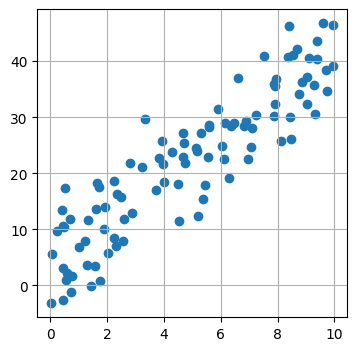

In [25]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y, marker='o')
# plt.title('Taxa de Erro (\u03B5) vs. Número de Vizinhos (k)')
# plt.xlabel('Número de Vizinhos (k)')
# plt.ylabel('Taxa de Erro (\u03B5)')
plt.grid(True)
plt.show()

4. Calculez les paramètres de régression linéaire sur ces données en utilisant la méthode des moindres carrés ordinaires

In [26]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
aw = w[0][0]
bw = w[-1][0]
print(w)

[[3.71761634]
 [4.03850426]]


5. Affichez le nuage de points et le modèle de régression linéaire sur un même graphique

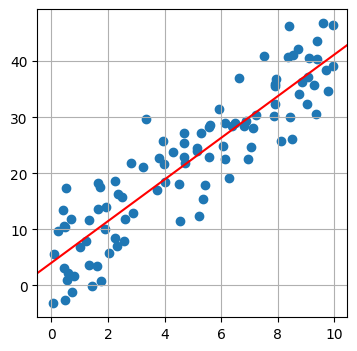

In [27]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y, marker='o')
plt.axline((0, bw), slope=aw, color='red')
# plt.title('Taxa de Erro (\u03B5) vs. Número de Vizinhos (k)')
# plt.xlabel('Número de Vizinhos (k)')
# plt.ylabel('Taxa de Erro (\u03B5)')
plt.grid(True)
plt.show()

6. Donnez votre analyse du résultat obtenu

### 2 Régression linéaire multiple
Cet exercice porte sur la régression linéaire multiple, c’est-à-dire pour des données décrites avec plusieurs caractéristiques. Pour cela, nous proposons d’utiliser le jeu de données prostate.csv disponible sur UniversiTICE. Ce jeu de données est présenté dans le livre ”Elements of Statistical Learning” de Hastie, Tibshirani et Friedman disponible en ligne au format PDF. Une description du problème est donnée à la page 49, section 3.2.1.

Le jeu de données comprend 8 caractéristiques, une variable cible appelée lpsa et une colonne train indiquant si les données appartiennent à l’ensemble d’apprentissage (T) ou de test (F).

1. Chargez les données :

In [28]:
path = "./prostate.csv"
df = pd.read_csv(path , header="infer", delimiter=";")
df = df.drop(["idx"], axis =1) #we drop the column "quality"
print("\n========= Dataset summary ========= \n")
df.describe()


========= Dataset summary ========= 



,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000
mean,3.433679e-17,7.084825e-16,4.292099e-16,-1.384917e-16,4.807151e-17,5.493887e-17,2.060208e-17,1.630998e-17,2.478387
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.154329
min,-2.288330e+00,-2.927180e+00,-3.071272e+00,-1.024706e+00,-5.229409e-01,-8.631712e-01,-1.042157e+00,-8.644665e-01,-0.430783
25%,-7.103074e-01,-5.907003e-01,-5.192637e-01,-1.024706e+00,-5.229409e-01,-8.631712e-01,-1.042157e+00,-8.644665e-01,1.731656
50%,8.222243e-02,-1.385505e-02,1.523174e-01,1.376813e-01,-5.229409e-01,-4.427980e-01,3.426271e-01,-3.326277e-01,2.591516
75%,6.592691e-01,5.776070e-01,5.552660e-01,1.004813e+00,-5.229409e-01,9.712290e-01,3.426271e-01,5.537703e-01,3.056357
max,2.096506e+00,2.687699e+00,2.032744e+00,1.534282e+00,1.892548e+00,2.205279e+00,3.112196e+00,2.681126e+00,5.582932


In [29]:
df.head(10)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-1.637356,-2.006212,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.430783,T
1,-1.988980,-0.722009,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519,T
2,-1.578819,-2.188784,1.361163,-1.024706,-0.522941,-0.863171,0.342627,-0.155348,-0.162519,T
3,-2.166917,-0.807994,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519,T
4,-0.507874,-0.458834,-0.250631,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,0.371564,T
5,-2.036128,-0.933955,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,0.765468,T
6,-0.519967,-0.362793,0.018001,0.354858,-0.522941,-0.863171,-1.042157,-0.864467,0.765468,F
7,-0.557313,-0.208757,-0.787896,0.990147,-0.522941,-0.863171,-1.042157,-0.864467,0.854415,T
8,-1.804254,-0.208757,-2.265375,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,1.047319,F
9,-0.956085,-0.897266,-0.116315,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,1.047319,F


2. Créez deux sous-ensembles de données, pour l’apprentissage et pour le test :

In [30]:
X_train = df[df.train=="T"].drop(["train", "lpsa"], axis =1)
y_train = df[df.train=="T"]["lpsa"]
X_test = df[df.train!="T"].drop(["train", "lpsa"], axis =1)
y_test = df[df.train!="T"]["lpsa"]


print(f"Trainset: n = {X_train.shape [0]} inst., d = {X_train.shape [1]} feat.")
...
print(f"Testset: m = {X_test.shape [0]} inst., d = {X_test.shape [1]} feat.")

Trainset: n = 67 inst., d = 8 feat.
Testset: m = 30 inst., d = 8 feat.


3. Calculez les paramètres du modèle de régression linéaire sur les données d’apprentissage

In [31]:
Xa = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
w = np.dot(np.linalg.inv(np.dot(Xa.T, Xa)), np.dot(Xa.T, y_train))
print(w[:-1])
print(w[-1])

[ 0.67952814  0.26305307 -0.14146483  0.21014656  0.3052006  -0.28849277
 -0.02130504  0.26695576]
2.4649329221237446


4. Quelles valeurs obtenez-vous pour w et pour b ? Vous pouvez comparer ces valeurs à celles du tableau 3.2 de la page 50 du livre (colonne Coefficient).

5. Utilisez le modèle résultant pour prédire les valeurs de y pour les données de test

In [32]:
X_test_one = np.column_stack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.dot(X_test_one, w)
print(y_pred)

[1.96903844 1.16995577 1.26117929 1.88375914 2.54431886 1.93275402
 2.04233571 1.83091625 1.99115929 1.32347076 2.93843111 2.20314404
 2.166421   2.79456237 2.67466879 2.18057291 2.40211068 3.02351576
 3.21122283 1.38441459 3.41751878 3.70741749 2.54118337 2.72969658
 2.64055575 3.48060024 3.17136269 3.2923494  3.11889686 3.76383999]


6. Calculez l’erreur quadratique moyenne (MSE) sur les données de test, ainsi que l’écart-type correspondant

In [35]:
MSE = np.mean(np.sum(y_test-y_pred)**2)
print(MSE)

std = np.std(y_test-y_pred)
print(std)

1.7031130990708239
0.7206813842605784


7. Quelles valeurs obtenez-vous ? Vous pouvez comparer ces valeurs à celles du tableau 3.3 de la page 63 du livre (Test Error et Std Error de la colonne LS).

### 3 Régression polynomiale
Nous proposons dans cet exercice de tester la régression polynomiale sur un problème synthétique.

1. Générez les données tel que :

$$y = a7x7 + a6x6 + a5x5 + a4x4 + a3x3 + a2x2 + a1x + a0 + u$$

où
- x est l’unique caractéristique des instances, dont les valeurs sont générées aléatoirement entre −5 et 5
- les coefficients ai sont générés aléatoirement entre −2 et 2
- u ∼ N (0, 2000)